In [1]:
import os
import numpy as np
import librosa
from librosa.filters import get_window
from utils import import_audio_files
from scipy.signal import stft
import matplotlib.pyplot as plt

dir_path = 'songs_data'
window_size = 256                                   # nfft
overlap = 128                                       # noverlap
fixed_shape = (window_size//2 + 1, 128)              # (129, 128)

all_audio_files = import_audio_files(dir_path)

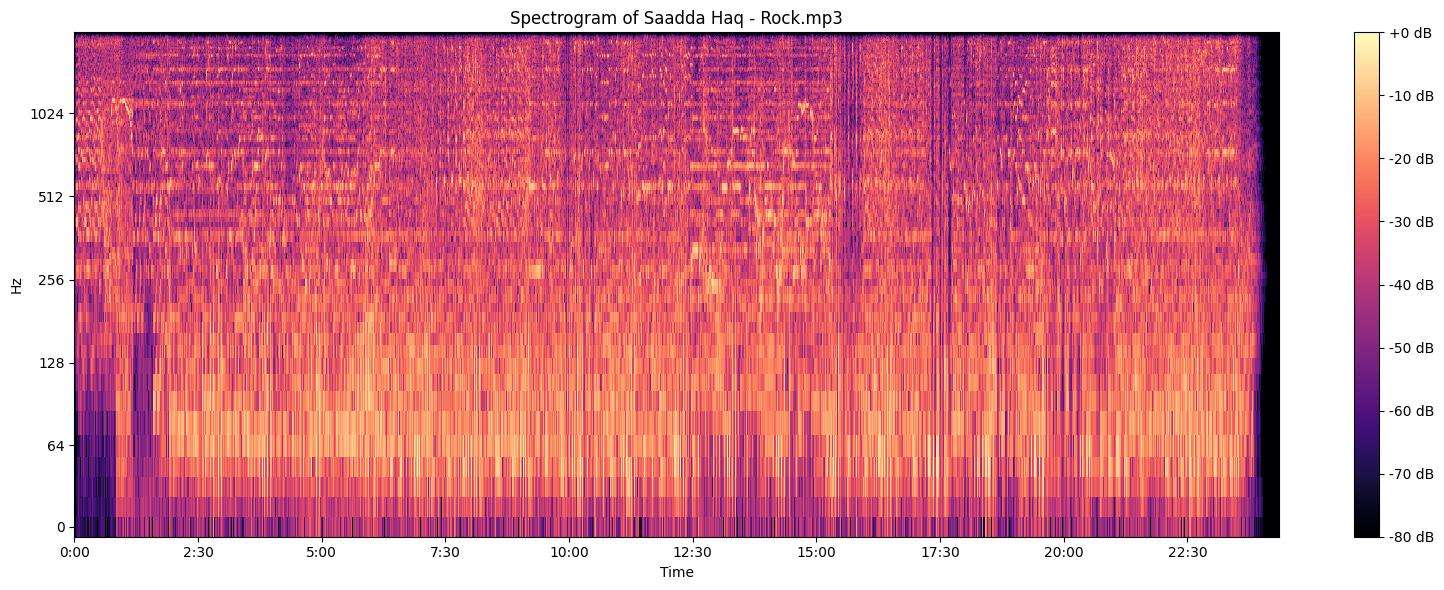

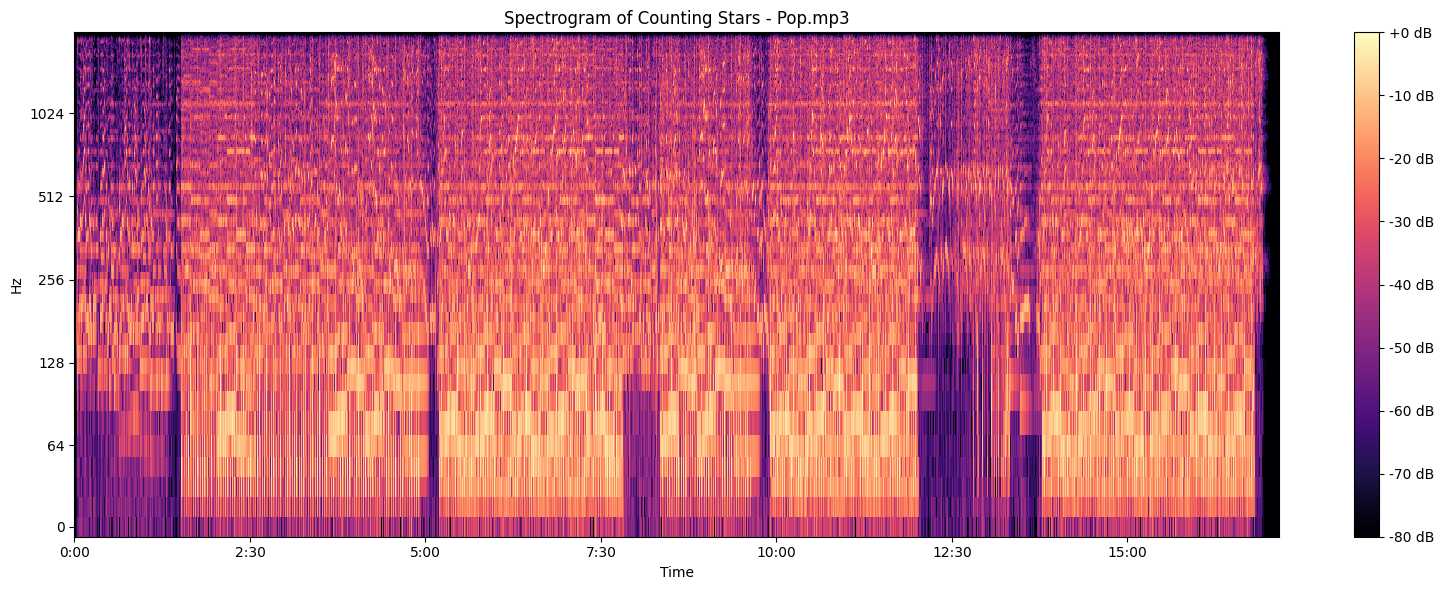

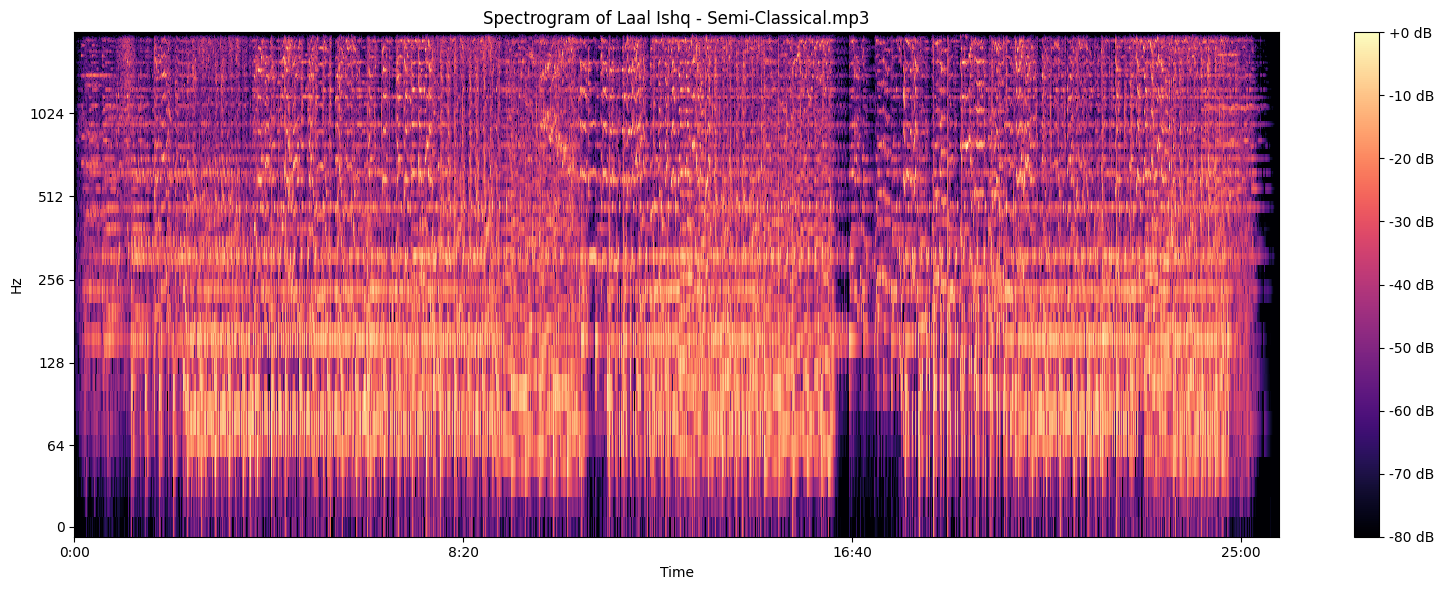

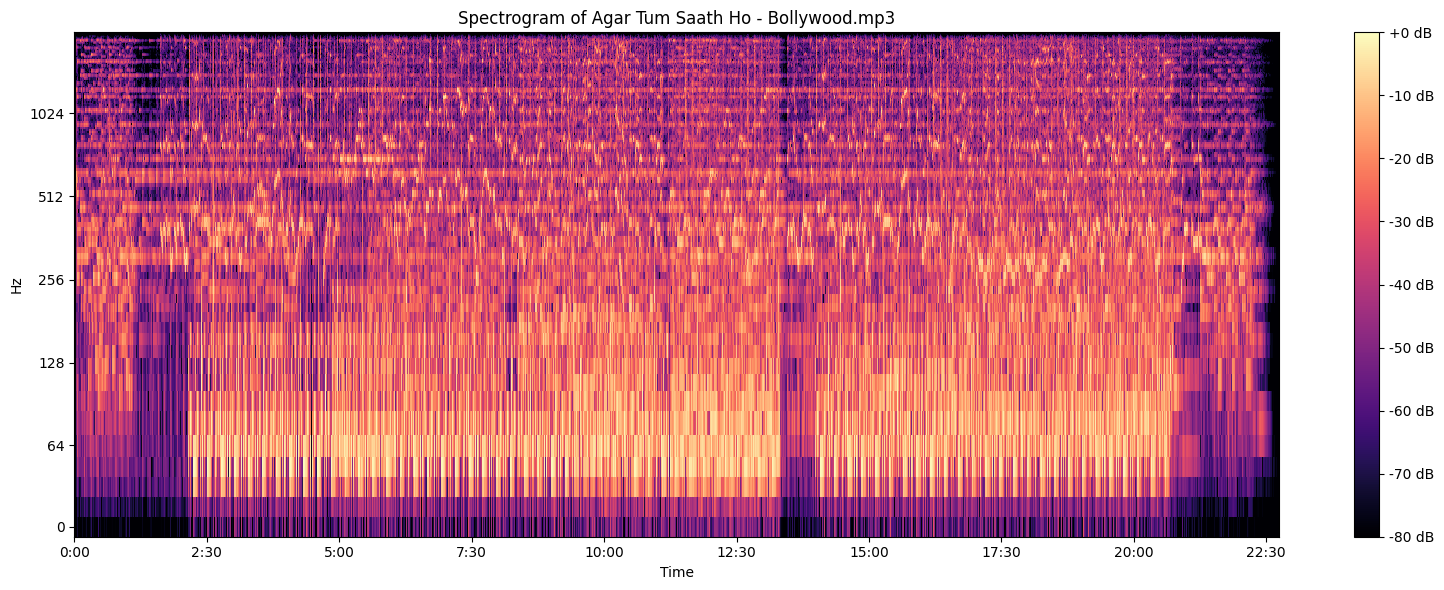

In [2]:
def plot_spectrogram(waveform, sr, filename):

    # waveform, sr = librosa.load(file_path, sr=None)
    window = get_window('hann', window_size, fftbins=True)
    _, _, Zxx = stft(waveform, window=window, nperseg=window_size, noverlap=overlap, fs=sr)
    spectrogram = np.abs(Zxx)

    plt.figure(figsize=(16, 6))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), y_axis='log', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {filename}')
    plt.tight_layout()
    plt.show()


for filename, wave, sr in all_audio_files:
    plot_spectrogram(wave, sr, filename)